# Quick note

The final dataset contains 76 columns, while the dataset transformed using dummy variables consists of 258 columns. I didn't want the user to input values for all 258 columns, as I believe this would not only be impractical but also significantly increase the chances of errors. Therefore, I created a *.py* file called `classification_converter.py` with function called *dummies_converter* that transforms the user's input into dummy variables and reshapes it into an appropriate format. Specifically, it converts the user's input of 76 values into an output containing 257 values (one value is missing because the *'SalePrice'* column was excluded to ensure the function's result is immediately ready for price predictions).

The project is organized into sections: default, cross-validation, scaled default, scaled cross-validation and mean error. The goal of this structure is to improve the organization of the project and to facilitate comparisons between all types of models.

**The project follows the following format:** 

* The cell in which the operation was performed

* The result of that operation

* A textual explanation detailing what was done in the cell, the conclusion, the idea, and similar information.

# Importing libraries

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [330]:
pwd

'C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification'

# Importing data

In [331]:
df = pd.read_csv('C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification\\Data\\Housing_Data_Final.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [332]:
columns = list(df.columns)

In [333]:
columns[37]

'SalePrice'

In [334]:
columns[1]

'MS SubClass'

In [335]:
columns[1], columns[37] = columns[37], columns[1]

In [336]:
df = df[columns]

In [337]:
df

,PID,SalePrice,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,215000,141.000000,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,105000,80.000000,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,172000,81.000000,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,244000,93.000000,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,189900,74.000000,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,923275080,142500,37.000000,7937,6,6,1984,1984,0.0,819.0,...,0,0,0,0,1,0,0,0,1,0
2922,923276100,131000,75.144444,8885,5,5,1983,1983,0.0,301.0,...,0,0,0,0,1,0,0,0,1,0
2923,923400125,132000,62.000000,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0
2924,924100070,170000,77.000000,10010,5,5,1974,1975,0.0,1071.0,...,0,0,0,0,1,0,0,0,1,0


# Train_test split

In [13]:
X = df.drop('MS SubClass', axis = 1)

In [14]:
y = df['MS SubClass']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Functions

In [17]:
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}

**I created 4 dictionaries to compare the performance of the models. Each dictionary is structured in the format `'model_name': metric_value`**

-----

In [18]:
def accuracy_function(model, preds):
    print(classification_report(y_test, preds, zero_division = 0))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

**This function displays confusion matrix and print classification report.**

-----

In [19]:
def accuracy_function_scaled(model, preds):
    print(classification_report(y_test, preds, zero_division = 0))
    ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

**This function displays confusion matrix and print classification report for scaled values for X_train and X_test.**

-----

In [20]:
def function_model(model, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_dict[model_name] = np.round(accuracy_score(y_test, preds), 2)
    precision_dict[model_name] = np.round(precision_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    recall_dict[model_name] = np.round(recall_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    f1_score_dict[model_name] = np.round(f1_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    accuracy_function(model, preds)

**This function fits the model, pulls the predictions from it, fills the dictionaries and calls the accuracy_function.**

-----

In [21]:
def function_model_scaled(model, model_name):
    model.fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_test)
    accuracy_dict[model_name] = np.round(accuracy_score(y_test, preds), 2)
    precision_dict[model_name] = np.round(precision_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    recall_dict[model_name] = np.round(recall_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    f1_score_dict[model_name] = np.round(f1_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    accuracy_function_scaled(model, preds)

**This function fits the model, pulls the predictions from it, fills the dictionaries and calls the accuracy_function_scaled for scaled values for X_train and X_test.**

-----

# Default models

**LOGISTIC REGRESSION**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_model = LogisticRegression(max_iter = 1000)

              precision    recall  f1-score   support

          20       0.37      0.79      0.50       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.22      0.16      0.19        81
          60       0.45      0.30      0.36       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       0.00      0.00      0.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       0.00      0.00      0.00        15

    accuracy                           0.37       732
   macro avg       0.07   

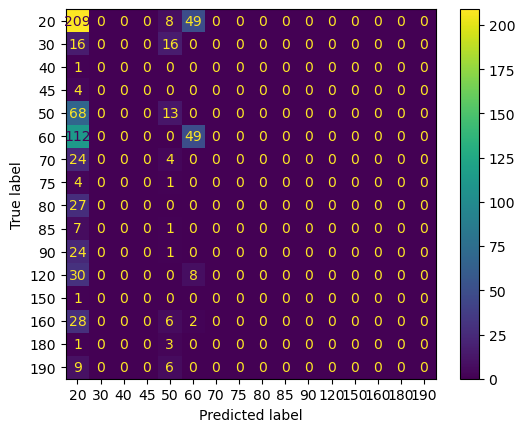

In [24]:
function_model(logistic_model, 'logistic_model_default')

**SUPPORT VECTOR MACHINES**

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()

              precision    recall  f1-score   support

          20       0.36      1.00      0.53       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.00      0.00      0.00       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       0.00      0.00      0.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       0.00      0.00      0.00        15

    accuracy                           0.36       732
   macro avg       0.02   

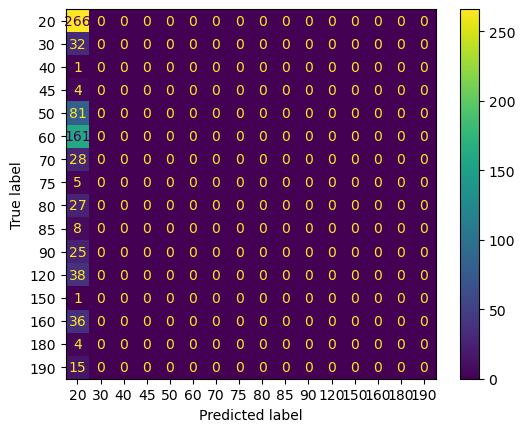

In [27]:
function_model(svc_model, 'svc_model_default')

**KNEAREST NEIGHBORS**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier()

              precision    recall  f1-score   support

          20       0.57      0.71      0.64       266
          30       0.36      0.47      0.41        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.46      0.38      0.42        81
          60       0.62      0.58      0.60       161
          70       0.47      0.32      0.38        28
          75       0.00      0.00      0.00         5
          80       0.25      0.11      0.15        27
          85       0.00      0.00      0.00         8
          90       0.44      0.16      0.24        25
         120       0.53      0.71      0.61        38
         150       0.00      0.00      0.00         1
         160       0.79      0.75      0.77        36
         180       0.20      0.25      0.22         4
         190       0.00      0.00      0.00        15

    accuracy                           0.55       732
   macro avg       0.29   

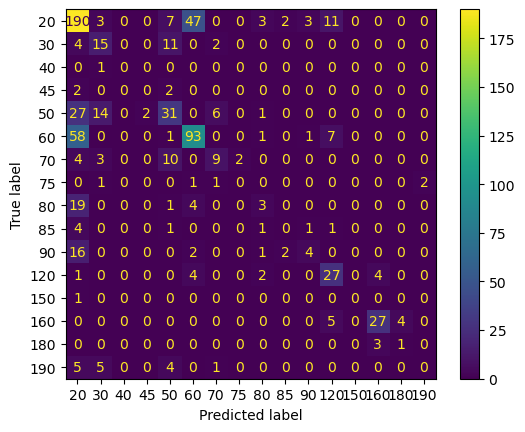

In [30]:
function_model(knn_model, 'knn_model_default')

**DECISION TREES**

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision_tree_model = DecisionTreeClassifier()

              precision    recall  f1-score   support

          20       1.00      0.98      0.99       266
          30       0.86      0.94      0.90        32
          40       0.00      0.00      0.00         1
          45       0.67      0.50      0.57         4
          50       0.92      0.99      0.95        81
          60       0.99      0.99      0.99       161
          70       0.96      0.86      0.91        28
          75       1.00      0.60      0.75         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       0.96      1.00      0.98        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       0.97      0.97      0.97        36
         180       0.80      1.00      0.89         4
         190       0.93      0.93      0.93        15

    accuracy                           0.97       732
   macro avg       0.81   

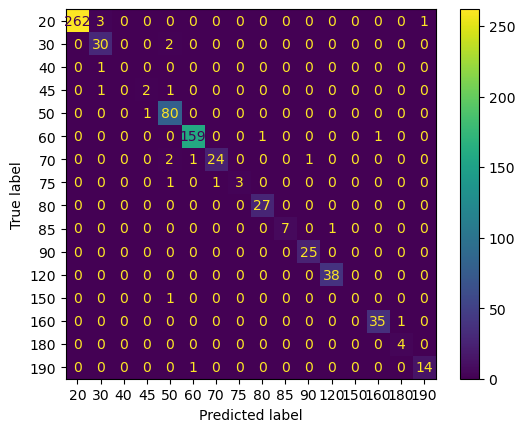

In [33]:
function_model(decision_tree_model, 'decision_tree_model_default')

**RANDOM FORESTS**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
random_forests_model = RandomForestClassifier()

              precision    recall  f1-score   support

          20       0.97      0.99      0.98       266
          30       0.88      0.91      0.89        32
          40       0.00      0.00      0.00         1
          45       0.50      0.25      0.33         4
          50       0.86      0.98      0.91        81
          60       0.99      0.99      0.99       161
          70       0.87      0.93      0.90        28
          75       0.00      0.00      0.00         5
          80       0.96      1.00      0.98        27
          85       0.78      0.88      0.82         8
          90       1.00      0.92      0.96        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       0.97      0.97      0.97        36
         180       1.00      1.00      1.00         4
         190       1.00      0.33      0.50        15

    accuracy                           0.95       732
   macro avg       0.74   

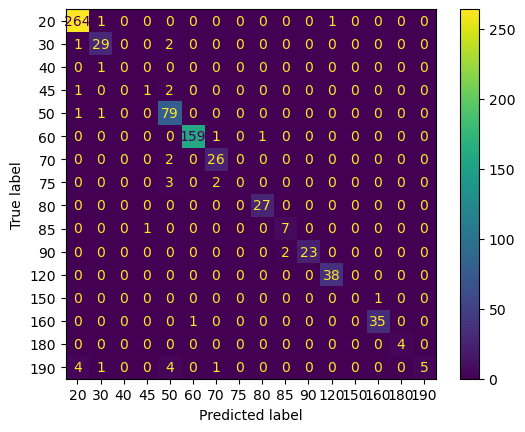

In [36]:
function_model(random_forests_model, 'random_forests_model_default')

**GRADIENT BOOSTING**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gradient_boosting_model = GradientBoostingClassifier()

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.97      0.94      0.95        32
          40       0.00      0.00      0.00         1
          45       0.75      0.75      0.75         4
          50       0.93      1.00      0.96        81
          60       0.99      0.99      0.99       161
          70       0.93      0.96      0.95        28
          75       1.00      0.40      0.57         5
          80       0.93      1.00      0.96        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       0.75      0.75      0.75         4
         190       1.00      0.93      0.97        15

    accuracy                           0.98       732
   macro avg       0.83   

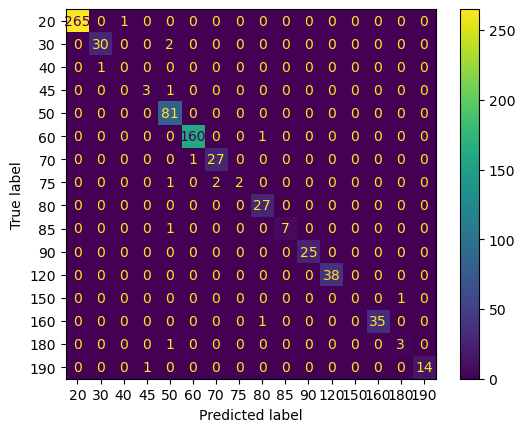

In [39]:
function_model(gradient_boosting_model, 'gradient_boosting_model_default')

**ADA BOOST**

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada_boost_model = AdaBoostClassifier()

              precision    recall  f1-score   support

          20       0.79      1.00      0.89       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.44      1.00      0.61       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       1.00      1.00      1.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.27      0.42        15

    accuracy                           0.62       732
   macro avg       0.20   

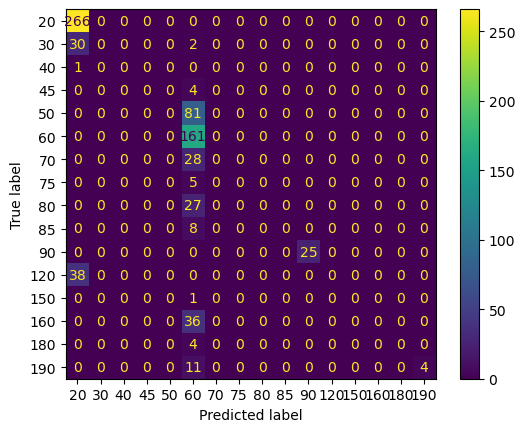

In [42]:
function_model(ada_boost_model, 'ada_boost_model_default')

# Scaled default models

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)

In [46]:
scaled_X_test = scaler.transform(X_test)

**LOGISTIC REGRESSION**

In [47]:
logistic_model_scaled = LogisticRegression(max_iter = 1000)

              precision    recall  f1-score   support

          20       0.98      0.98      0.98       266
          30       0.79      0.84      0.82        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.90      0.96      0.93        81
          60       0.99      0.96      0.98       161
          70       0.74      0.82      0.78        28
          75       0.67      0.40      0.50         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       1.00      1.00      1.00        15

    accuracy                           0.96       732
   macro avg       0.82   

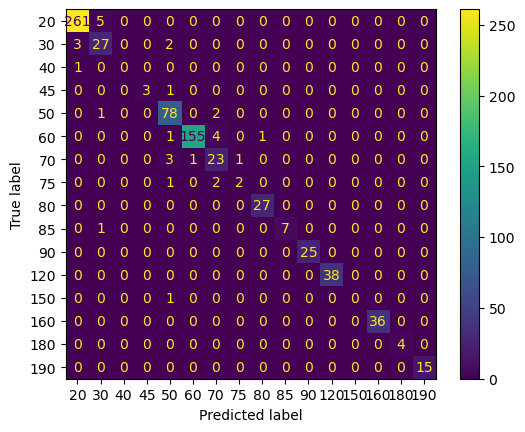

In [48]:
function_model_scaled(logistic_model_scaled, 'logistic_model_scaled')

**SUPPORT VECTOR MACHINES**

In [49]:
svc_model_scaled = SVC()

              precision    recall  f1-score   support

          20       0.84      0.99      0.91       266
          30       0.76      0.59      0.67        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.77      0.83      0.80        81
          60       0.99      0.94      0.96       161
          70       0.82      0.50      0.62        28
          75       1.00      0.20      0.33         5
          80       0.96      0.89      0.92        27
          85       1.00      0.62      0.77         8
          90       1.00      0.80      0.89        25
         120       1.00      0.95      0.97        38
         150       0.00      0.00      0.00         1
         160       1.00      0.94      0.97        36
         180       1.00      1.00      1.00         4
         190       1.00      0.60      0.75        15

    accuracy                           0.89       732
   macro avg       0.82   

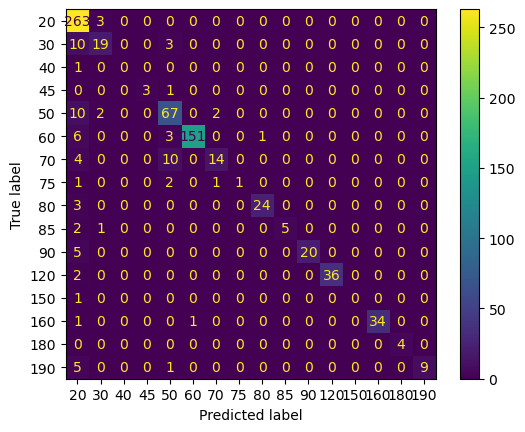

In [50]:
function_model_scaled(svc_model_scaled, 'svc_model_scaled')

**KNEAREST NEIGHBORS**

In [51]:
knn_model_scaled = KNeighborsClassifier()

              precision    recall  f1-score   support

          20       0.74      0.92      0.82       266
          30       0.33      0.47      0.39        32
          40       0.00      0.00      0.00         1
          45       0.75      0.75      0.75         4
          50       0.56      0.47      0.51        81
          60       0.86      0.85      0.85       161
          70       0.46      0.21      0.29        28
          75       1.00      0.20      0.33         5
          80       0.80      0.44      0.57        27
          85       0.60      0.38      0.46         8
          90       1.00      0.64      0.78        25
         120       0.94      0.87      0.90        38
         150       0.00      0.00      0.00         1
         160       0.92      0.92      0.92        36
         180       1.00      0.75      0.86         4
         190       0.67      0.13      0.22        15

    accuracy                           0.75       732
   macro avg       0.66   

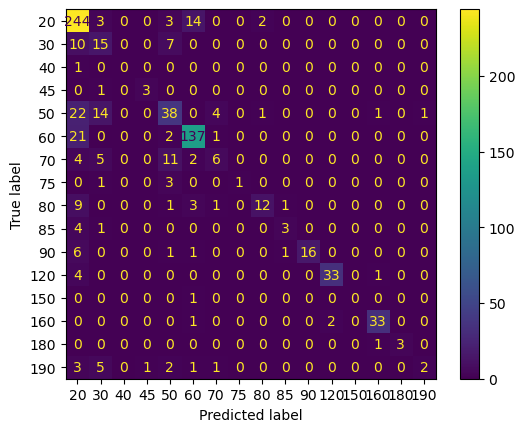

In [52]:
function_model_scaled(knn_model_scaled, 'knn_model_scaled')

**DECISION TREES**

In [53]:
decision_tree_model_scaled = DecisionTreeClassifier()

              precision    recall  f1-score   support

          20       1.00      0.98      0.99       266
          30       0.88      0.91      0.89        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.92      0.98      0.95        81
          60       0.98      0.99      0.98       161
          70       0.92      0.86      0.89        28
          75       1.00      0.60      0.75         5
          80       0.96      0.96      0.96        27
          85       1.00      0.88      0.93         8
          90       0.96      1.00      0.98        25
         120       0.95      1.00      0.97        38
         150       0.00      0.00      0.00         1
         160       0.97      0.94      0.96        36
         180       0.80      1.00      0.89         4
         190       0.88      0.93      0.90        15

    accuracy                           0.97       732
   macro avg       0.83   

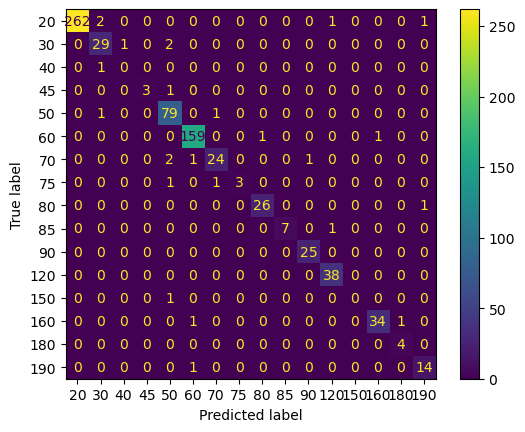

In [54]:
function_model_scaled(decision_tree_model_scaled, 'decision_tree_model_scaled')

**RANDOM FORESTS**

In [55]:
random_forests_model_scaled = RandomForestClassifier()

              precision    recall  f1-score   support

          20       0.97      1.00      0.99       266
          30       0.82      0.88      0.85        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.84      0.98      0.90        81
          60       1.00      0.99      0.99       161
          70       0.86      0.89      0.88        28
          75       0.00      0.00      0.00         5
          80       0.96      1.00      0.98        27
          85       0.88      0.88      0.88         8
          90       1.00      0.96      0.98        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       0.97      1.00      0.99        36
         180       1.00      1.00      1.00         4
         190       1.00      0.33      0.50        15

    accuracy                           0.95       732
   macro avg       0.71   

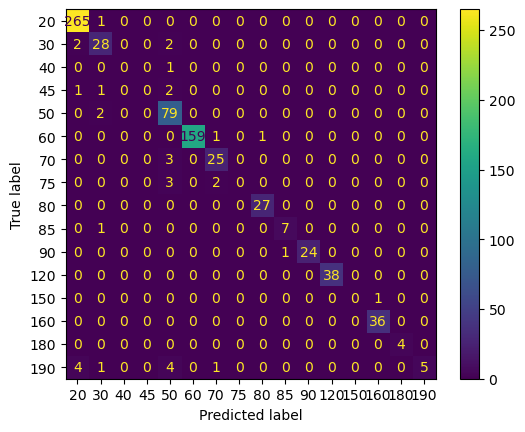

In [56]:
function_model_scaled(random_forests_model_scaled, 'random_forests_model_scaled')

**GRADIENT BOOSTING**

In [57]:
gradient_boosting_model_scaled = GradientBoostingClassifier()

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.97      0.94      0.95        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.92      0.99      0.95        81
          60       0.99      0.99      0.99       161
          70       0.96      0.96      0.96        28
          75       1.00      0.40      0.57         5
          80       0.93      1.00      0.96        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       0.75      0.75      0.75         4
         190       1.00      0.93      0.97        15

    accuracy                           0.98       732
   macro avg       0.82   

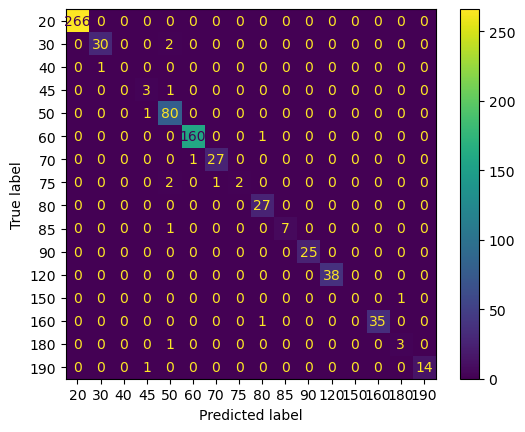

In [58]:
function_model_scaled(gradient_boosting_model_scaled, 'gradient_boosting_model_scaled')

**ADA BOOST**

In [59]:
ada_boost_model_scaled = AdaBoostClassifier()

              precision    recall  f1-score   support

          20       0.79      1.00      0.89       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.44      1.00      0.61       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       1.00      1.00      1.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.27      0.42        15

    accuracy                           0.62       732
   macro avg       0.20   

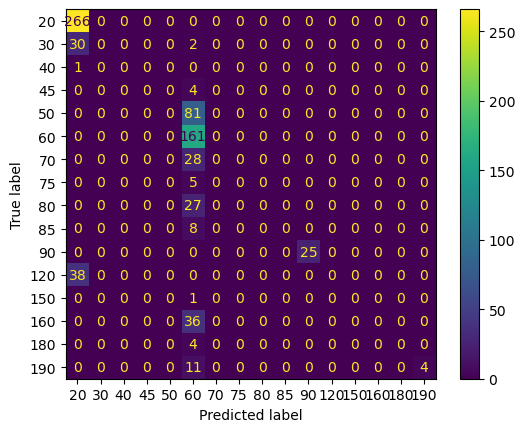

In [60]:
function_model_scaled(ada_boost_model_scaled, 'ada_boost_model_scaled')

# Cross-Validation

In [61]:
from sklearn.model_selection import GridSearchCV

-----

**LOGISTIC REGRESSION**

***penalty: l1***

In [62]:
log_model_l1_cv = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')

In [63]:
C = np.linspace(0.1, 1, 10)
l1_ratio = np.linspace(0, 1, 10)

In [64]:
param_grid_l1 = {'C' : C}

In [65]:
logistic_model_l1_cv = GridSearchCV(estimator = log_model_l1_cv, param_grid = param_grid_l1)

              precision    recall  f1-score   support

          20       0.99      0.99      0.99       266
          30       0.88      0.88      0.88        32
          40       0.00      0.00      0.00         1
          45       0.75      0.75      0.75         4
          50       0.95      0.99      0.97        81
          60       0.99      0.99      0.99       161
          70       0.89      0.89      0.89        28
          75       0.75      0.60      0.67         5
          80       0.93      1.00      0.96        27
          85       1.00      1.00      1.00         8
          90       1.00      1.00      1.00        25
         120       1.00      0.97      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       1.00      1.00      1.00         4
         190       1.00      1.00      1.00        15

    accuracy                           0.97       732
   macro avg       0.82   

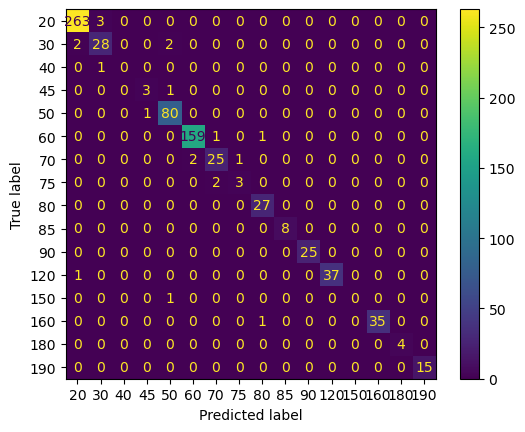

In [66]:
function_model_scaled(logistic_model_l1_cv, 'logistic_model_l1_cv')

***penalty: l2***

In [67]:
log_model_l2_cv = LogisticRegression(max_iter = 1000, penalty = 'l2')

In [68]:
param_grid_l2 = {'C' : C}

In [69]:
logistic_model_l2_cv = GridSearchCV(estimator = log_model_l2_cv, param_grid = param_grid_l2)

              precision    recall  f1-score   support

          20       0.98      0.98      0.98       266
          30       0.77      0.84      0.81        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.91      0.98      0.94        81
          60       0.99      0.96      0.98       161
          70       0.77      0.82      0.79        28
          75       0.67      0.40      0.50         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       1.00      1.00      1.00        15

    accuracy                           0.96       732
   macro avg       0.82   

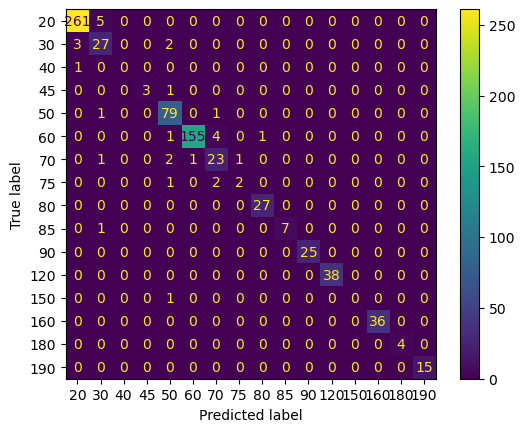

In [70]:
function_model_scaled(logistic_model_l2_cv, 'logistic_model_l2_cv')

In [71]:
logistic_model_l1_cv.best_params_

{'C': 0.6}

In [72]:
logistic_model_l2_cv.best_params_

{'C': 0.6}

**SUPPORT VECTOR MACHINES**

In [73]:
svm_cv = SVC()

In [74]:
C = [0.001, 0.01, 0.1, 0.5, 1] 
kernel = ['linear', 'rbf', 'poly']
gamma = ['scale', 'auto']
degree = [2, 3, 4]

In [75]:
param_grid = {'C' : C, 'kernel' : kernel, 'gamma' : gamma, 'degree' : degree}

In [76]:
svm_model_cv = GridSearchCV(estimator = svm_cv, param_grid = param_grid)

              precision    recall  f1-score   support

          20       0.98      0.98      0.98       266
          30       0.84      0.84      0.84        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.92      0.99      0.95        81
          60       0.99      0.97      0.98       161
          70       0.86      0.86      0.86        28
          75       0.75      0.60      0.67         5
          80       0.96      1.00      0.98        27
          85       1.00      1.00      1.00         8
          90       1.00      1.00      1.00        25
         120       1.00      0.97      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       0.93      0.93      0.93        15

    accuracy                           0.96       732
   macro avg       0.80   

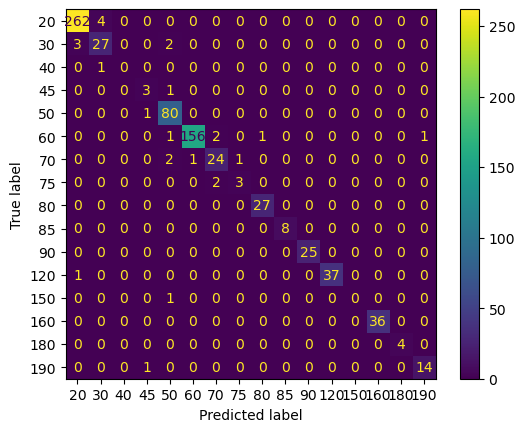

In [77]:
function_model_scaled(svm_model_cv, 'svm_model_cv')

**DECISION TREES**

In [78]:
decision_model_cv = DecisionTreeClassifier()

In [79]:
param_grid = {'splitter' : ['best', 'random'],
              'max_depth' : [None, 1, 2, 3, 4, 5],
              'criterion' : ['entropy', 'gini', 'log_loss']}

In [80]:
decision_trees_model_cv = GridSearchCV(estimator = decision_model_cv, param_grid = param_grid) 

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.93      0.88      0.90        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.94      0.96      0.95        81
          60       0.99      0.99      0.99       161
          70       0.89      0.89      0.89        28
          75       1.00      0.60      0.75         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       0.96      1.00      0.98        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       0.97      0.94      0.96        36
         180       0.67      1.00      0.80         4
         190       0.94      1.00      0.97        15

    accuracy                           0.97       732
   macro avg       0.83   

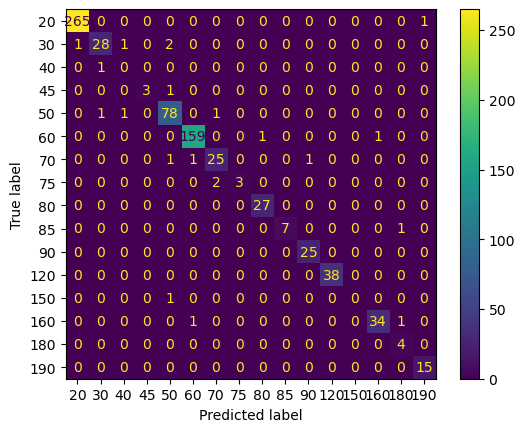

In [81]:
function_model_scaled(decision_trees_model_cv, 'decision_trees_model_cv')

In [126]:
decision_trees_model_cv.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}

**RANDOM FORESTS**

In [82]:
random_model_cv = RandomForestClassifier()

In [83]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [84]:
param_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'bootstrap' : bootstrap, 'oob_score' : oob_score}

In [85]:
random_forests_model_cv = GridSearchCV(estimator = random_model_cv, param_grid = param_grid)

C:\Users\jovan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jovan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jovan\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\U

              precision    recall  f1-score   support

          20       0.91      0.99      0.95       266
          30       0.80      0.75      0.77        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.73      0.91      0.81        81
          60       0.98      0.98      0.98       161
          70       0.89      0.57      0.70        28
          75       0.00      0.00      0.00         5
          80       1.00      0.78      0.88        27
          85       1.00      0.25      0.40         8
          90       1.00      1.00      1.00        25
         120       0.95      0.97      0.96        38
         150       0.00      0.00      0.00         1
         160       1.00      0.94      0.97        36
         180       1.00      1.00      1.00         4
         190       1.00      0.40      0.57        15

    accuracy                           0.91       732
   macro avg       0.70   

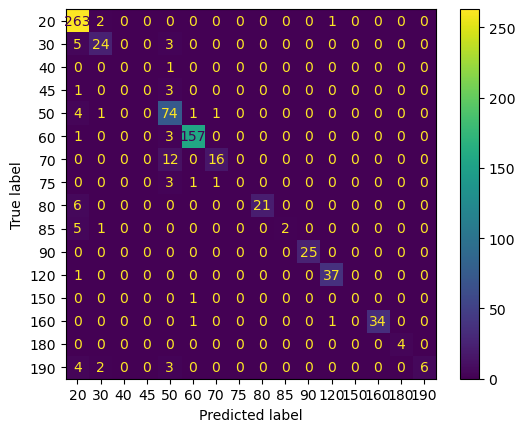

In [86]:
function_model_scaled(random_forests_model_cv, 'random_forests_model_cv')

In [87]:
random_forests_model_cv.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 200,
 'oob_score': False}

**GRADIENT BOOSTING**

In [88]:
gradient_model_cv = GradientBoostingClassifier()

In [89]:
n_estimators =  [100, 200]
subsample = [0.3, 0.6]

In [90]:
param_grid = {'n_estimators' : n_estimators, 'subsample' : subsample}

In [91]:
gradient_boosting_model_cv = GridSearchCV(estimator = gradient_model_cv, param_grid = param_grid)

              precision    recall  f1-score   support

          20       0.00      0.00      0.00       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.93      0.96      0.95       161
          70       0.46      0.79      0.58        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       1.00      0.88      0.93         8
          90       0.00      0.00      0.00        25
         120       0.07      0.95      0.14        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.60      0.75      0.67         4
         190       0.00      0.00      0.00        15

    accuracy                           0.30       732
   macro avg       0.19   

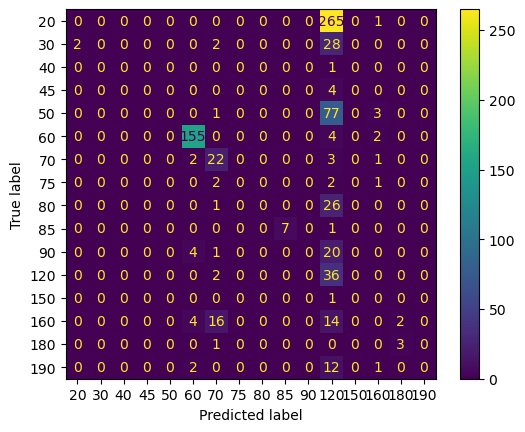

In [92]:
function_model_scaled(gradient_boosting_model_cv, 'gradient_boosting_model_cv')

In [93]:
gradient_boosting_model_cv.best_params_

{'n_estimators': 200, 'subsample': 0.6}

**ADA BOOST**

In [94]:
ada_model_cv = AdaBoostClassifier()

In [95]:
n_estimators = [100, 150, 200]
learning_rate = [0.001, 0.01, 0.1]

In [96]:
param_grid = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}

In [97]:
ada_boost_model_cv = GridSearchCV(estimator = ada_model_cv, param_grid = param_grid)

              precision    recall  f1-score   support

          20       0.78      1.00      0.87       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.61      1.00      0.76        81
          60       0.78      0.98      0.87       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.89      0.93      0.91        27
          85       0.78      0.88      0.82         8
          90       1.00      0.72      0.84        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.07      0.12        15

    accuracy                           0.76       732
   macro avg       0.37   

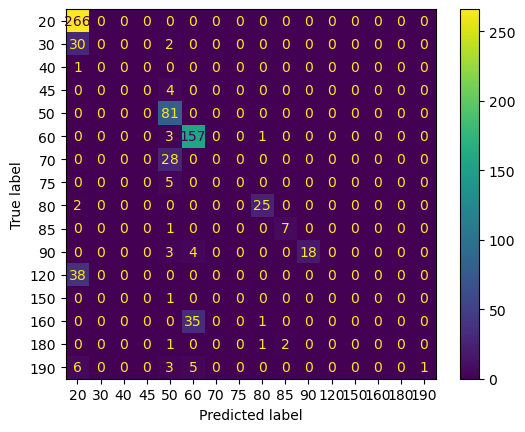

In [98]:
function_model_scaled(ada_boost_model_cv, 'ada_boost_model_cv')

In [99]:
ada_boost_model_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 150}

# Model overview

In this section, the selection of the optimal model takes place. I analyzed the results of all the models in the project and visually represented them using barplots.


In order to visually represent the evaluated performance of the models, I sorted the values in the dictionary based on a specific metric. After sorting, I converted the dictionary into a pd.Series() object to visualize it using a bar plot. I applied the same procedure 4 times, once for each of the four dictionaries.

In [100]:
accuracy_sorted = dict(sorted(accuracy_dict.items(), key = lambda item : item[1]))

In [101]:
accuracy_sorted_series = pd.Series(accuracy_sorted)

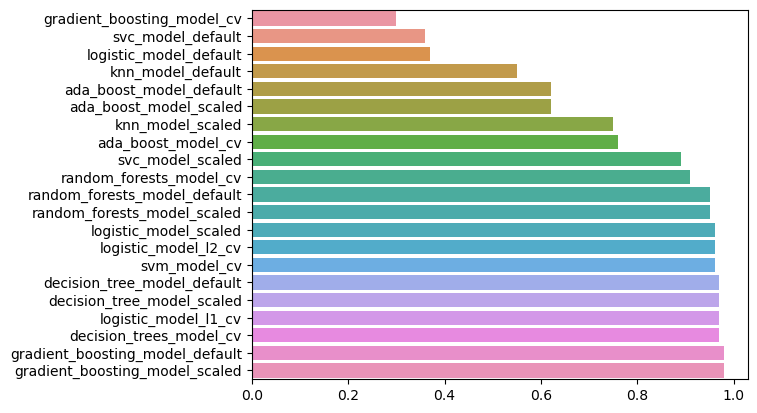

In [102]:
sns.barplot(x = accuracy_sorted_series, y = accuracy_sorted_series.index);

In [103]:
precision_sorted = dict(sorted(precision_dict.items(), key = lambda item : item[1]))

In [104]:
precision_sorted_series = pd.Series(precision_sorted)

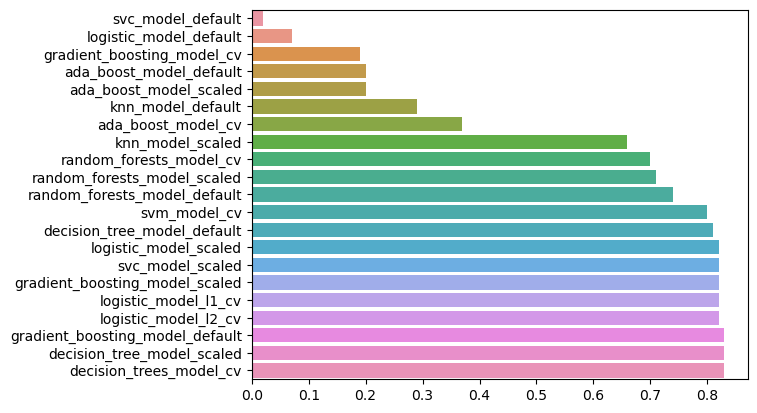

In [105]:
sns.barplot(x = precision_sorted_series, y = precision_sorted_series.index);

In [106]:
recall_sorted = dict(sorted(recall_dict.items(), key = lambda item : item[1]))

In [107]:
recall_sorted_series = pd.Series(recall_sorted)

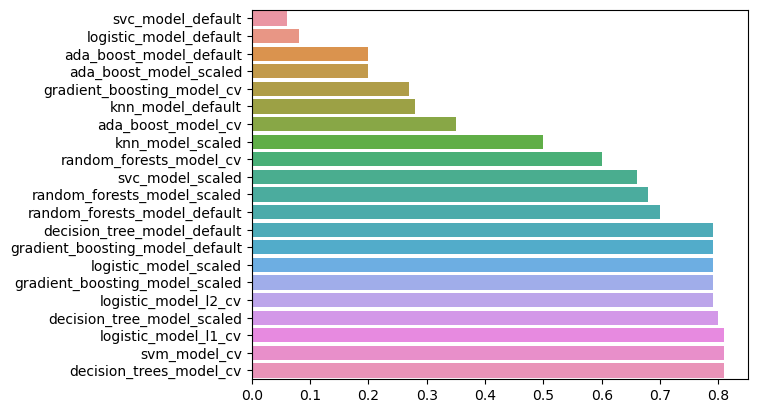

In [108]:
sns.barplot(x = recall_sorted_series, y = recall_sorted_series.index);

In [109]:
f1_score_sorted = dict(sorted(f1_score_dict.items(), key = lambda item : item[1]))

In [110]:
f1_score_series = pd.Series(f1_score_sorted)

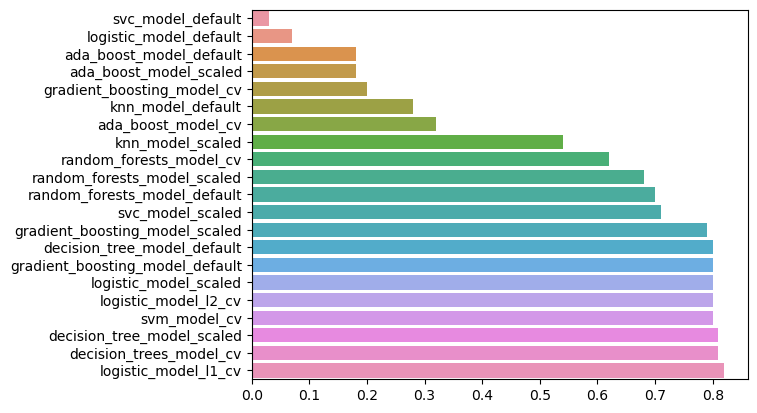

In [111]:
sns.barplot(x = f1_score_series, y = f1_score_series.index);

-----

**Now, I want to compare the evaluated performance of my models. I will achieve this by combining the dictionaries into a single DataFrame, adding two additional columns: *'sum'* which contains the sum of the four metrics I applied and *'mean'* which contains the average of these metrics.**

In [112]:
comparison_df = pd.DataFrame({
    'accuracy_dict' : pd.Series(accuracy_dict),
    'precision_dict' : pd.Series(precision_dict),
    'recall_dict' : pd.Series(recall_dict),
    'f1_score_dict' : pd.Series(f1_score_dict)
})

In [113]:
comparison_df['sum'] = comparison_df[['accuracy_dict', 'precision_dict', 'recall_dict', 'f1_score_dict']].sum(axis = 1)

In [114]:
comparison_df['mean'] = comparison_df[['accuracy_dict', 'precision_dict', 'recall_dict', 'f1_score_dict']].mean(axis = 1)

In [115]:
comparison_df.sort_values('mean', ascending = False)

,accuracy_dict,precision_dict,recall_dict,f1_score_dict,sum,mean
logistic_model_l1_cv,0.97,0.82,0.81,0.82,3.42,0.8550
decision_trees_model_cv,0.97,0.83,0.81,0.81,3.42,0.8550
decision_tree_model_scaled,0.97,0.83,0.80,0.81,3.41,0.8525
gradient_boosting_model_default,0.98,0.83,0.79,0.80,3.40,0.8500
gradient_boosting_model_scaled,0.98,0.82,0.79,0.79,3.38,0.8450
decision_tree_model_default,0.97,0.81,0.79,0.80,3.37,0.8425
logistic_model_scaled,0.96,0.82,0.79,0.80,3.37,0.8425
svm_model_cv,0.96,0.80,0.81,0.80,3.37,0.8425
logistic_model_l2_cv,0.96,0.82,0.79,0.80,3.37,0.8425
random_forests_model_default,0.95,0.74,0.70,0.70,3.09,0.7725


<Axes: xlabel='mean'>

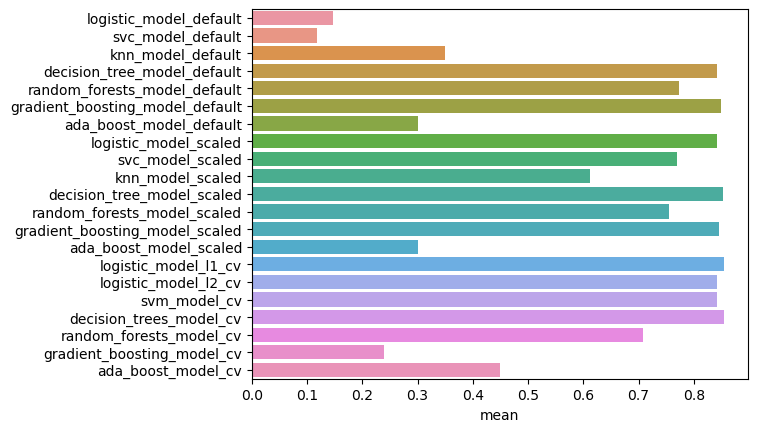

In [117]:
sns.barplot(data = comparison_df, x = comparison_df['mean'], y = comparison_df.index)

-----

# Conclusion

After thoroughly testing the top 9 models with the best performance, I arrived at the following conclusion. Decision tree-based algorithms and logistic regression models were overly fitted to the training data, leading to overfitting. As a result, in most cases, any input data was predominantly associated with houses belonging to categories 20 or 60 (the two most frequent categories in the training dataset).

However, after conducting the same tests with the gradient boosting model, I observed that it produced accurate predictions in the majority of cases. This was expected due to the nature of the algorithm and its ability to recognize more complex patterns.

In the end, I decided to use the `gradient_boosting_model_default` instead of its cross-validated version. The main resaon for that was the fact that the cross-validation would significantly increase the model's complexity, training time, and overall computational cost.

-----

# Final model

In this final section, I reviewed all the parameters of my model and exported it under the name `final_classification_model.joblib`. The model is saved in the *Model* folder.

In [594]:
final_model = gradient_boosting_model

In [595]:
final_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [596]:
from joblib import dump

In [597]:
dump(final_model, 'C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification\\Models\\final_classification_model.joblib')

['C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification\\Models\\final_classification_model.joblib']